In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as asc
from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

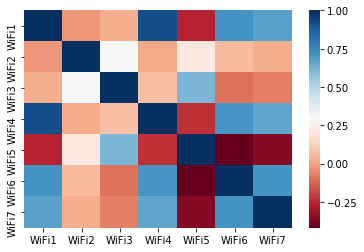

In [12]:
#Importing data from csv file
data = pd.read_csv("data_knock_off.csv")
features = data.drop(["Room"],axis=1)

#Finding the correlation between features
corr = features.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

# Imputing Using Mean

In [13]:
from sklearn.impute import SimpleImputer
Xt = data.drop(["Room"],axis=1)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Xt)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [14]:
df = pd.DataFrame(imp.transform(Xt), columns = ['WiFi1','WiFi2','WiFi3','WiFi4','WiFi5','WiFi6','WiFi7'])
df["Room"] = data.Room
y = data.Room
df.head()

,WiFi1,WiFi2,WiFi3,WiFi4,WiFi5,WiFi6,WiFi7,Room
0,-64.000000,-56.0,-61.000,-66.0,-71.0,-82.0,-81.0,1
1,-52.362222,-57.0,-61.000,-65.0,-71.0,-85.0,-85.0,1
2,-63.000000,-60.0,-54.955,-67.0,-76.0,-85.0,-84.0,1
3,-52.362222,-60.0,-68.000,-62.0,-77.0,-90.0,-80.0,1
4,-52.362222,-65.0,-60.000,-63.0,-77.0,-81.0,-87.0,1


In [15]:
X=df.iloc[:,:-1].values
y=df.iloc[:,7].values
y = label_binarize(y, classes=[1,2,3,4])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# Classification using Decision Tree

# Tuning Decision Tree by changing parameters

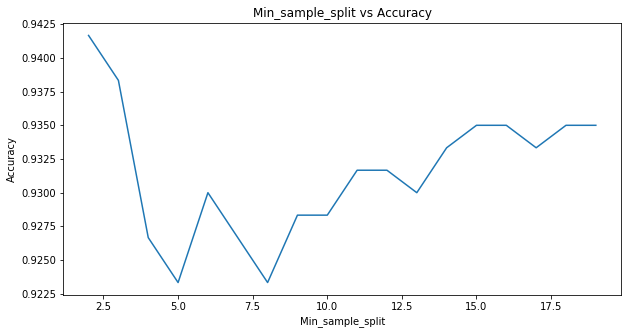

Sample_split vs Accuracy
[[ 2.          0.94166667]
 [ 3.          0.93833333]
 [ 4.          0.92666667]
 [ 5.          0.92333333]
 [ 6.          0.93      ]
 [ 7.          0.92666667]
 [ 8.          0.92333333]
 [ 9.          0.92833333]
 [10.          0.92833333]
 [11.          0.93166667]
 [12.          0.93166667]
 [13.          0.93      ]
 [14.          0.93333333]
 [15.          0.935     ]
 [16.          0.935     ]
 [17.          0.93333333]
 [18.          0.935     ]
 [19.          0.935     ]]


In [55]:
# By changing the min_sample_split
acu1 = []
splits =[]
for i in range(2,20):
    # Create Decision Tree classifer object
    clf_dt1 = DecisionTreeClassifier(criterion="gini", min_samples_split=i)

    # Train Decision Tree Classifer
    clf_dt1 = clf_dt1.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt1.predict(X_test)
    splits.append(i)
    acu1.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize = (10,5))
plt.plot(splits,acu1)
plt.xlabel("Min_sample_split")
plt.ylabel("Accuracy")
plt.title("Min_sample_split vs Accuracy")
plt.show()
a = np.asmatrix(splits)
b = np.asmatrix(acu1)
output = np.stack((a,b))
print('Sample_split vs Accuracy')
print(output.transpose())

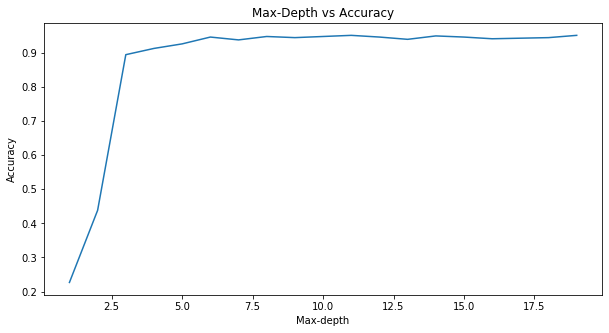

Max Depth vs Accuracy
[[ 1.          0.22666667]
 [ 2.          0.43833333]
 [ 3.          0.895     ]
 [ 4.          0.91333333]
 [ 5.          0.92666667]
 [ 6.          0.94666667]
 [ 7.          0.93833333]
 [ 8.          0.94833333]
 [ 9.          0.945     ]
 [10.          0.94833333]
 [11.          0.95166667]
 [12.          0.94666667]
 [13.          0.94      ]
 [14.          0.95      ]
 [15.          0.94666667]
 [16.          0.94166667]
 [17.          0.94333333]
 [18.          0.945     ]
 [19.          0.95166667]]


In [36]:
#By changing the max_depth
acu2 = []
dep =[]
for i in range(1,20):
    # Create Decision Tree classifer object
    clf_dt2 = DecisionTreeClassifier(criterion="gini", max_depth=i)

    # Train Decision Tree Classifer
    clf_dt2 = clf_dt2.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt2.predict(X_test)
    dep.append(i)
    acu2.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize = (10,5))
plt.plot(dep,acu2)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy")
plt.show()
a = np.asmatrix(dep)
b = np.asmatrix(acu2)
output = np.stack((a,b))
print('Max Depth vs Accuracy')
print(output.transpose())

# Printing accuracy for best model

In [19]:
if max(acu2)>max(acu1):
    i = acu2.index(max(acu2))
    clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = dep[i])
    clf_dt = clf_dt.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)
else:
    i = acu1.index(max(acu1))
    clf_dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = splits[i])
    clf_dt = clf.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)

#Creating confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_dt.argmax(axis=1))
#Printing accuracy
print(f"Accuracy: {asc(y_pred_dt, y_test)}")
print(("\nConfusion Matrix:"))
print(cm)


Accuracy: 0.95

Confusion Matrix:
[[134   0   1   7]
 [  0 148   9   0]
 [  2   7 133   4]
 [  0   0   0 155]]


# ROC and AUC for Decision Tree

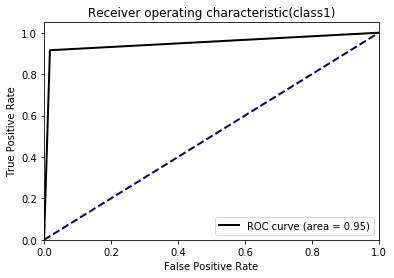

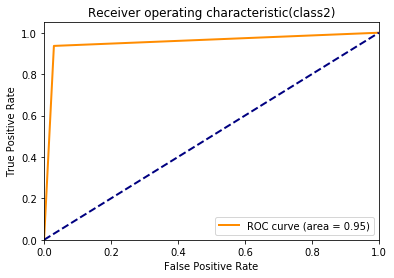

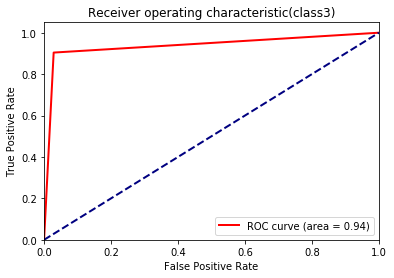

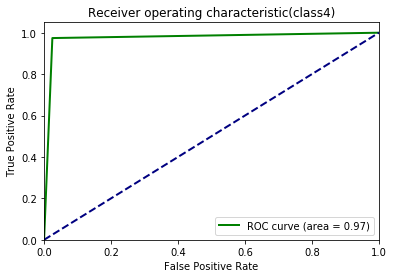

In [20]:
classifier = OneVsRestClassifier(clf_dt)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# Classification using SVM

In [21]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf')
clf_svm.fit(X_train, y_train.argmax(axis=1))

# Predicting the test set result
y_pred_svm = clf_svm.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_svm)

print(f"Accuracy: {asc(y_pred_svm, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.7016666666666667

Confusion Matrix:
[[ 86  56   0   0]
 [  0 155   2   0]
 [  0  59  87   0]
 [  1  61   0  93]]


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# ROC and AUC for SVM

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

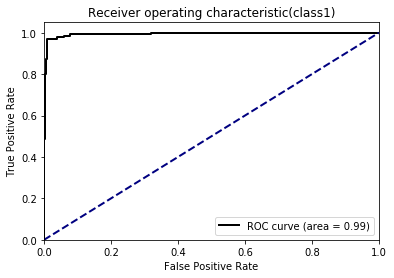

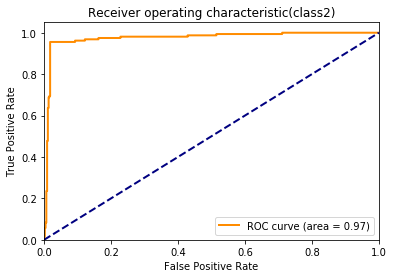

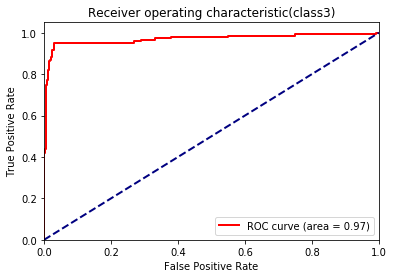

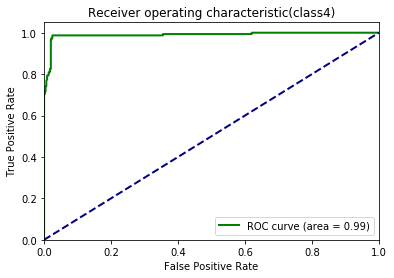

In [22]:
classifier = OneVsRestClassifier(SVC(kernel='rbf',probability = True))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()    

# Classification using LDA

In [23]:
# Create model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train.argmax(axis=1))

# Predicting the test set result
y_pred_lda = clf_lda.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_lda)

print(f"Accuracy: {asc(y_pred_lda, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.9333333333333333

Confusion Matrix:
[[137   0   4   1]
 [  1 136  20   0]
 [  1   1 141   3]
 [  2   0   7 146]]


# ROC and AUC for LDA

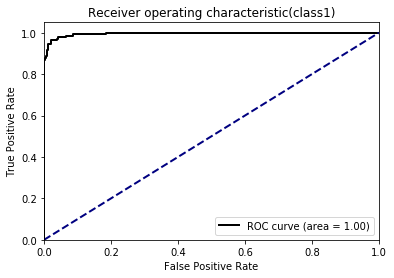

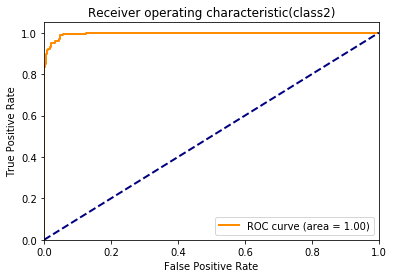

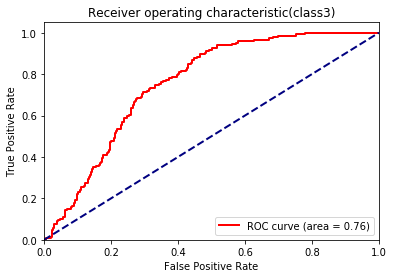

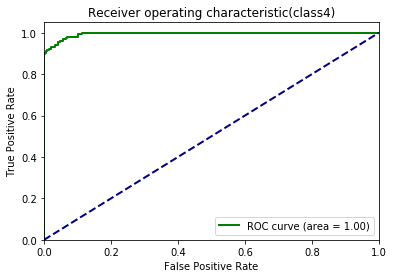

In [24]:
classifier = OneVsRestClassifier(clf_lda)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# Classification using QDA

In [25]:
# Create model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train, y_train.argmax(axis=1))

# Predicting the test set result
y_pred_qda = clf_qda.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_qda)

print(f"Accuracy: {asc(y_pred_qda, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.9683333333333334

Confusion Matrix:
[[140   0   1   1]
 [  0 151   6   0]
 [  3   2 136   5]
 [  0   0   1 154]]


# ROC and AUC for QDA

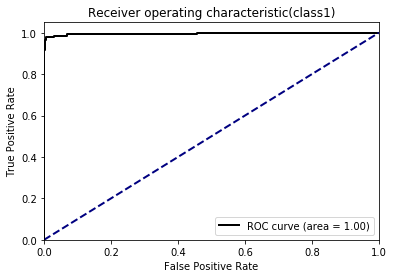

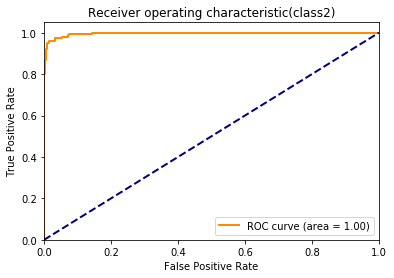

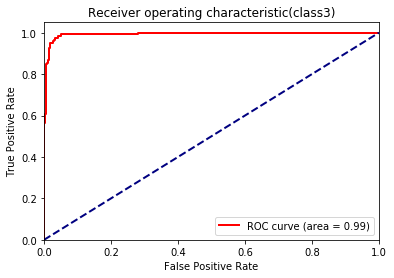

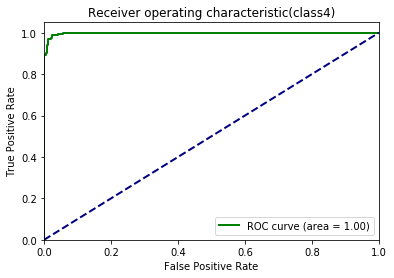

In [26]:
classifier = OneVsRestClassifier(clf_qda)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# Classification using KNN

In [56]:
# Create model
from sklearn.neighbors import KNeighborsClassifier
k_val = []
acu_val = []
for k in range(1,22):
    clf_knn = KNeighborsClassifier(n_neighbors = k)
    clf_knn.fit(X_train, y_train.argmax(axis=1))
    y_pred_knn = clf_knn.predict(X_test)
    k_val.append(k)
    acu = asc(y_pred_knn, y_test.argmax(axis=1))
    acu_val.append(acu)
a = np.asmatrix(k_val)
b = np.asmatrix(acu_val)
output = np.stack((a,b))
print('K-Value vs Accuracy')
print(output.transpose())

K-Value vs Accuracy
[[ 1.          0.94833333]
 [ 2.          0.945     ]
 [ 3.          0.95666667]
 [ 4.          0.955     ]
 [ 5.          0.95      ]
 [ 6.          0.95333333]
 [ 7.          0.96333333]
 [ 8.          0.96166667]
 [ 9.          0.96333333]
 [10.          0.965     ]
 [11.          0.96333333]
 [12.          0.96666667]
 [13.          0.96333333]
 [14.          0.96666667]
 [15.          0.96333333]
 [16.          0.965     ]
 [17.          0.96      ]
 [18.          0.96166667]
 [19.          0.95833333]
 [20.          0.96333333]
 [21.          0.95833333]]


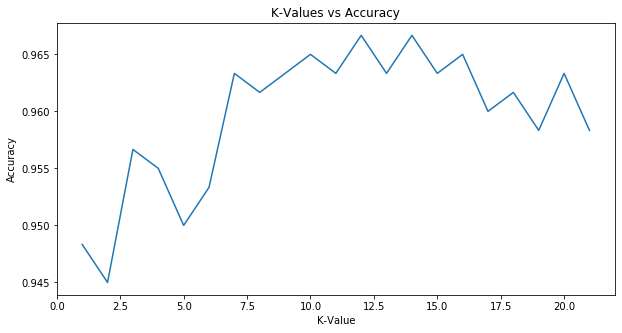

In [28]:
# Plotting K-value vs Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(k_val,acu_val)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.title("K-Values vs Accuracy")
plt.show()

# Creating best model 

In [29]:
i = acu_val.index(max(acu_val))
clf_knn = KNeighborsClassifier(n_neighbors = k_val[i])
clf_knn.fit(X_train, y_train.argmax(axis=1))
y_pred_knn = clf_knn.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_knn)
print(f"Accuracy: {asc(y_pred_knn, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.9666666666666667

Confusion Matrix:
[[139   0   1   2]
 [  0 150   7   0]
 [  1   1 141   3]
 [  2   0   3 150]]


# ROC and AUC for KNN

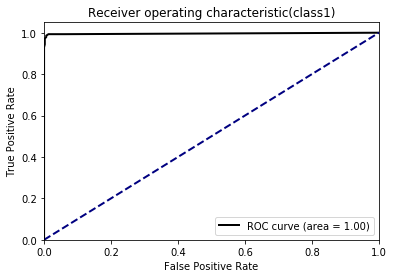

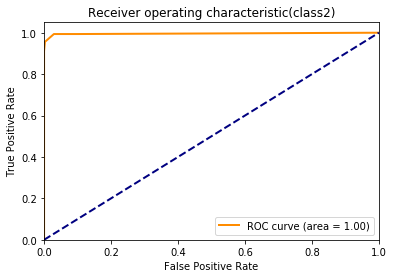

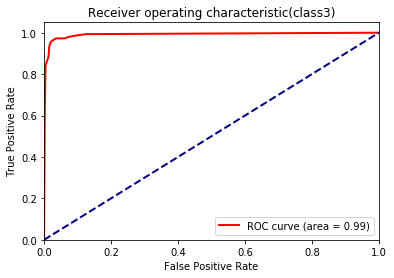

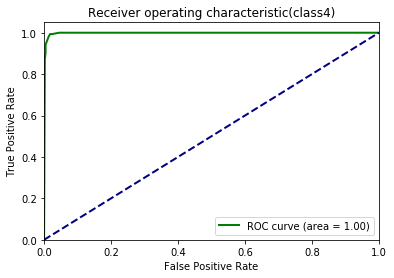

In [30]:
classifier = OneVsRestClassifier(clf_knn)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# K-Fold Cross Validation for model with best accuracy

In [44]:
# The best model is QDA
a = 0
for i in range(2,500):
    scores_res = model_selection.cross_val_score(clf_qda, X, y.argmax(axis=1), cv=i)
    if a < scores_res.mean():
        a = scores_res.mean()
        j = i
print(f'Max Accuracy = {a:.3}\nNo. of Folds = {j}')
    #print(scores_res.mean())

Max Accuracy = 0.969
No. of Folds = 340
